In [1]:
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
%matplotlib inline
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

In [3]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [4]:
from sklearn.naive_bayes import GaussianNB
model_norm = GaussianNB().fit(X, y)

In [5]:
model_norm.class_prior_

array([0.33333333, 0.33333333, 0.33333333])

In [6]:
model_norm.theta_

array([[5.006, 3.428, 1.462, 0.246],
       [5.936, 2.77 , 4.26 , 1.326],
       [6.588, 2.974, 5.552, 2.026]])

In [7]:
model_norm.sigma_

array([[0.121764, 0.140816, 0.029556, 0.010884],
       [0.261104, 0.0965  , 0.2164  , 0.038324],
       [0.396256, 0.101924, 0.298496, 0.073924]])

In [8]:
y_pred = model_norm.predict(X)

from sklearn.metrics import confusion_matrix
confusion_matrix(y, y_pred)

array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  3, 47]])

In [9]:
from sklearn.metrics import classification_report
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.94      0.94      0.94        50
           2       0.94      0.94      0.94        50

    accuracy                           0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150



In [11]:
likelihood = [
    (sp.stats.norm(model_norm.theta_[0][0], np.sqrt(model_norm.sigma_[0][0])).pdf(X[0]) * \
     sp.stats.norm(model_norm.theta_[0][1], np.sqrt(model_norm.sigma_[0][1])).pdf(X[1])),
    (sp.stats.norm(model_norm.theta_[1][0], np.sqrt(model_norm.sigma_[1][0])).pdf(X[0]) * \
     sp.stats.norm(model_norm.theta_[1][1], np.sqrt(model_norm.sigma_[1][1])).pdf(X[1])),
]
likelihood

[array([5.34143768e-04, 5.72219087e-05, 3.57521722e-30, 6.68959037e-58]),
 array([1.62495847e-11, 8.85155101e-06, 4.63702794e-22, 5.96891280e-43])]

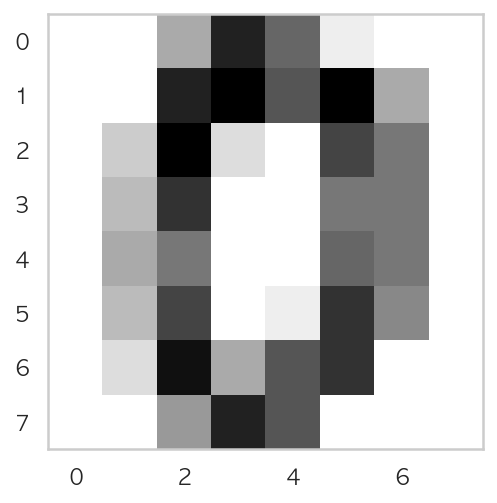

In [12]:
from sklearn.datasets import load_digits
digits = load_digits()
X = digits.data
y = digits.target
plt.imshow(X[0,:].reshape((8,8)), cmap=plt.cm.binary)
plt.grid(False)

In [13]:
from sklearn.preprocessing import Binarizer
X = Binarizer(7).fit_transform(X)
from sklearn.naive_bayes import BernoulliNB # binarizer는 베르누이 자체에 포함되어 있음. 인수만 써도 됌.
model_norm = BernoulliNB().fit(X, y)

In [14]:
y_pred = model_norm.predict(X)

from sklearn.metrics import confusion_matrix
confusion_matrix(y, y_pred)


array([[173,   0,   0,   0,   2,   1,   1,   0,   1,   0],
       [  0, 145,   9,   0,   0,   1,   2,   0,  16,   9],
       [  0,   7, 159,   3,   0,   0,   0,   2,   4,   2],
       [  0,   3,   2, 156,   0,   2,   0,   5,   5,  10],
       [  0,   4,   0,   0, 170,   0,   0,   4,   3,   0],
       [  0,   1,   0,   3,   2, 161,   1,   0,   0,  14],
       [  1,   3,   0,   0,   1,   0, 174,   0,   2,   0],
       [  0,   0,   1,   0,   1,   0,   0, 177,   0,   0],
       [  0,  15,   2,   2,   0,   6,   1,   0, 143,   5],
       [  0,   3,   1,   3,   1,   4,   0,   7,   4, 157]])

In [15]:
from sklearn.metrics import classification_report
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       178
           1       0.80      0.80      0.80       182
           2       0.91      0.90      0.91       177
           3       0.93      0.85      0.89       183
           4       0.96      0.94      0.95       181
           5       0.92      0.88      0.90       182
           6       0.97      0.96      0.97       181
           7       0.91      0.99      0.95       179
           8       0.80      0.82      0.81       174
           9       0.80      0.87      0.83       180

    accuracy                           0.90      1797
   macro avg       0.90      0.90      0.90      1797
weighted avg       0.90      0.90      0.90      1797



In [16]:
X[0,:].reshape((8,8))

array([[0., 0., 0., 1., 1., 0., 0., 0.],
       [0., 0., 1., 1., 1., 1., 0., 0.],
       [0., 0., 1., 0., 0., 1., 1., 0.],
       [0., 0., 1., 0., 0., 1., 1., 0.],
       [0., 0., 1., 0., 0., 1., 1., 0.],
       [0., 0., 1., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 1., 1., 0., 0.],
       [0., 0., 0., 1., 1., 0., 0., 0.]])

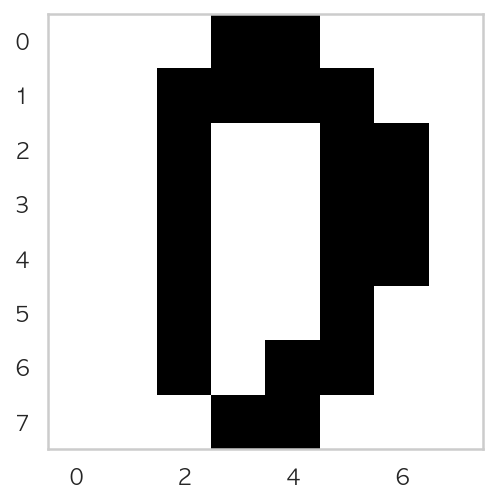

In [17]:
plt.imshow(X[0,:].reshape((8,8)),cmap=plt.cm.binary)
plt.grid(False)

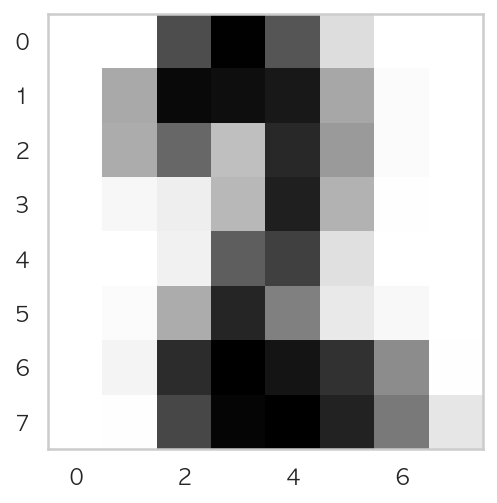

In [18]:
plt.imshow(np.exp(model_norm.feature_log_prob_)[2].reshape((8,8)), cmap=plt.cm.binary)
plt.grid(False)

In [19]:
from sklearn.datasets import load_digits
digits = load_digits()
X = digits.data
y = digits.target

from sklearn.naive_bayes import GaussianNB

model = GaussianNB().fit(X,y)
y_pred = model.predict(X)

In [20]:
from sklearn.metrics import classification_report
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       178
           1       0.83      0.85      0.84       182
           2       0.98      0.64      0.77       177
           3       0.94      0.79      0.86       183
           4       0.98      0.84      0.90       181
           5       0.91      0.93      0.92       182
           6       0.96      0.99      0.98       181
           7       0.72      0.99      0.83       179
           8       0.58      0.86      0.69       174
           9       0.94      0.71      0.81       180

    accuracy                           0.86      1797
   macro avg       0.88      0.86      0.86      1797
weighted avg       0.89      0.86      0.86      1797



In [21]:
from sklearn.datasets import fetch_covtype

In [22]:
covtype = fetch_covtype()

In [25]:
X = covtype.data
y = covtype.target
X1 = X[:,:10]
X2 = X[:,10:]
X1[0],X2[0]

(array([2.596e+03, 5.100e+01, 3.000e+00, 2.580e+02, 0.000e+00, 5.100e+02,
        2.210e+02, 2.320e+02, 1.480e+02, 6.279e+03]),
 array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]))

In [32]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB

model1 = GaussianNB().fit(X1,y)
model2 = BernoulliNB().fit(X2,y)

prob1 = model1.predict_proba(X1)
prob2 = model2.predict_proba(X2)

likel1 = prob1 / model1.class_prior_
likel2 = prob2 / model1.class_prior_

prob = likel1 * likel2 * model1.class_prior_
# prob /= np.repeat(prob.sum(axis = 1)[:, np.newaxis], 7, axis = 1)
y_pred = np.argmax(prob, axis = 1)+1 #범위가 0~6까지기 때문에 1~7로 만들어줌.

In [33]:
confusion_matrix(y, y_pred)

array([[140348,  53648,    157,      0,   2071,    881,  14735],
       [ 65031, 188638,   5849,     19,  12541,   7752,   3471],
       [     0,   2307,  23675,   3094,   1319,   5359,      0],
       [     0,      0,    551,   1941,      0,    255,      0],
       [   245,   5134,    275,      0,   3513,    326,      0],
       [     0,   1910,   6230,    621,    464,   8142,      0],
       [  6371,    183,      0,      0,     22,      0,  13934]])

In [34]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           1       0.66      0.66      0.66    211840
           2       0.75      0.67      0.71    283301
           3       0.64      0.66      0.65     35754
           4       0.34      0.71      0.46      2747
           5       0.18      0.37      0.24      9493
           6       0.36      0.47      0.41     17367
           7       0.43      0.68      0.53     20510

    accuracy                           0.65    581012
   macro avg       0.48      0.60      0.52    581012
weighted avg       0.68      0.65      0.66    581012

